In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import math


In [7]:
df = pd.read_csv(r'dane.csv')

In [8]:
df

,Kod TERYT,Nazwa województwa,Rok zgonu,Miesiąc zgonu,Zgony kobiet Przedział wiekowy 0-64 lata,Zgony kobiet Przedział wiekowy 65 lat i więcej,Zgony mężczyn Przedział wiekowy 0-64 lata,Zgony mężczyzn Przedział wiekowy 65 lat i więcej
0,2,DOLNOŚLĄSKIE,2022,1,258,1692,550,1370
1,2,DOLNOŚLĄSKIE,2022,2,202,1440,416,1189
2,2,DOLNOŚLĄSKIE,2022,3,216,1382,429,1185
3,2,DOLNOŚLĄSKIE,2022,4,185,1241,429,1054
4,4,KUJAWSKO-POMORSKIE,2022,1,162,1047,387,929
...,...,...,...,...,...,...,...,...
1275,30,WIELKOPOLSKIE,2015,12,227,1029,503,883
1276,32,ZACHODNIOPOMORSKIE,2015,9,127,477,249,389
1277,32,ZACHODNIOPOMORSKIE,2015,10,110,521,284,456
1278,32,ZACHODNIOPOMORSKIE,2015,11,141,522,290,414


In [9]:
df.rename(columns = {'Zgony kobiet Przedział wiekowy 0-64 lata':'K<=64', 
                     'Zgony kobiet Przedział wiekowy 65 lat i więcej':'K>=65', 
                     'Zgony mężczyn Przedział wiekowy 0-64 lata':'M<=64',
                     'Zgony mężczyzn Przedział wiekowy 65 lat i więcej':'M>=65',
                     'Nazwa województwa': 'województwo',
                     'Rok zgonu': 'rok',
                     'Miesiąc zgonu': 'miesiąc'             
                    }, 
          inplace = True)
df.drop(columns=['Kod TERYT'],inplace = True)


df

,województwo,rok,miesiąc,K<=64,K>=65,M<=64,M>=65
0,DOLNOŚLĄSKIE,2022,1,258,1692,550,1370
1,DOLNOŚLĄSKIE,2022,2,202,1440,416,1189
2,DOLNOŚLĄSKIE,2022,3,216,1382,429,1185
3,DOLNOŚLĄSKIE,2022,4,185,1241,429,1054
4,KUJAWSKO-POMORSKIE,2022,1,162,1047,387,929
...,...,...,...,...,...,...,...
1275,WIELKOPOLSKIE,2015,12,227,1029,503,883
1276,ZACHODNIOPOMORSKIE,2015,9,127,477,249,389
1277,ZACHODNIOPOMORSKIE,2015,10,110,521,284,456
1278,ZACHODNIOPOMORSKIE,2015,11,141,522,290,414


In [10]:
labels = ['DOLNOŚLĄSKIE',
'KUJAWSKO-POMORSKIE',
'LUBELSKIE',
'LUBUSKIE',
'MAZOWIECKIE',
'MAŁOPOLSKIE',
'OPOLSKIE',
'PODKARPACKIE',
'PODLASKIE',
'POMORSKIE',
'WARMIŃSKO-MAZURSKIE',
'WIELKOPOLSKIE',
'ZACHODNIOPOMORSKIE',
'ŁÓDZKIE',
'ŚLĄSKIE',
'ŚWIĘTOKRZYSKIE']

In [11]:
df_woman64 = math.floor(df['K<=64'].sum())
df_woman65 = math.floor(df['K>=65'].sum())

all_woman = df_woman64 + df_woman65

df_men64 = math.floor(df['M<=64'].sum())
df_men65 = math.floor(df['M>=65'].sum())

all_man = df_men64 + df_men65

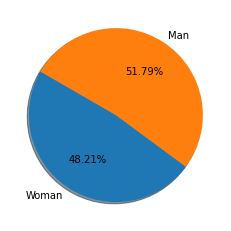

In [12]:
labelsSex = 'Woman', 'Man'
sizes = [all_woman, all_man]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labelsSex, autopct='%1.2f%%',
        shadow=True, startangle=150)

plt.show()

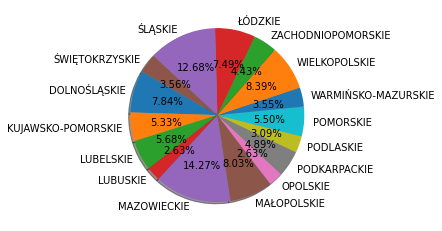

In [13]:
ZgonyWWojewodztwachSuma = df.groupby(['województwo']).agg(['sum'])

daneKoncowe = []
for x in ZgonyWWojewodztwachSuma.to_numpy()[:,2:6]:
    daneKoncowe.append(x.sum())

sizes = daneKoncowe
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=150)

plt.show()

In [14]:
dataBar1 = df[
    (df['rok'] == 2021)
].groupby(['województwo']).agg({'K<=64': ['sum'],'K>=65': ['sum'],'M<=64': ['sum'],'M>=65': ['sum']})

dataBar1numpy = dataBar1.to_numpy()
dataBar1

,K<=64,K>=65,M<=64,M>=65
,sum,sum,sum,sum
województwo,,,,
DOLNOŚLĄSKIE,2760,16717,6144,14495
KUJAWSKO-POMORSKIE,1960,11606,4278,10263
LUBELSKIE,1754,13253,4437,10988
LUBUSKIE,969,5545,2391,4961
MAZOWIECKIE,4390,31754,10796,26744
MAŁOPOLSKIE,2412,17532,5789,15473
OPOLSKIE,822,5693,2046,4883
PODKARPACKIE,1468,11157,3805,9858


In [15]:
width = 0.4
index = np.arange(len(labels))

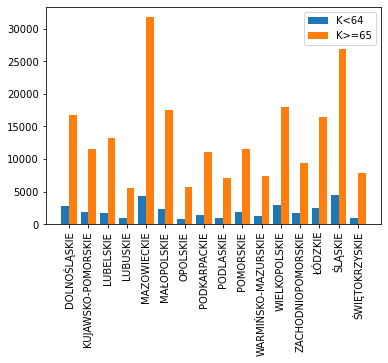

In [16]:
plt.bar(index - width/2, dataBar1numpy[:,0],width, label='K<64')
plt.bar(index + width/2, dataBar1numpy[:,1],width, label='K>=65')
plt.xticks(index, labels,rotation='vertical')
plt.legend()
plt.show()

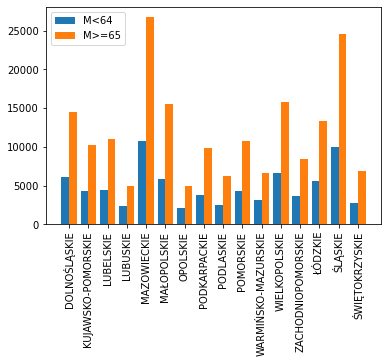

In [17]:
plt.bar(index - width/2, dataBar1numpy[:,2],width, label='M<64')
plt.bar(index + width/2, dataBar1numpy[:,3],width, label='M>=65')
plt.xticks(index, labels,rotation='vertical')
plt.legend()
plt.show()

In [18]:
dataBar2 = df[
    (df['rok'] == 2015)
].groupby(['województwo']).agg({'K<=64': ['sum'],'K>=65': ['sum'],'M<=64': ['sum'],'M>=65': ['sum']})

dataBar2numpy = dataBar2.to_numpy()
dataBar2

,K<=64,K>=65,M<=64,M>=65
,sum,sum,sum,sum
województwo,,,,
DOLNOŚLĄSKIE,829,3764,1972,3048
KUJAWSKO-POMORSKIE,565,2407,1234,2125
LUBELSKIE,428,2833,1257,2360
LUBUSKIE,277,1180,654,967
MAZOWIECKIE,1391,7152,3310,5812
MAŁOPOLSKIE,720,4031,1681,3362
OPOLSKIE,238,1350,586,1101
PODKARPACKIE,404,2476,1027,2019


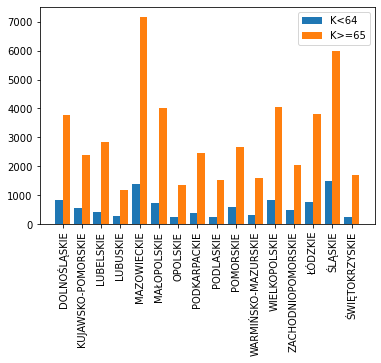

In [19]:
plt.bar(index - width/2, dataBar2numpy[:,0],width, label='K<64')
plt.bar(index + width/2, dataBar2numpy[:,1],width, label='K>=65')
plt.xticks(index, labels,rotation='vertical')
plt.legend()
plt.show()

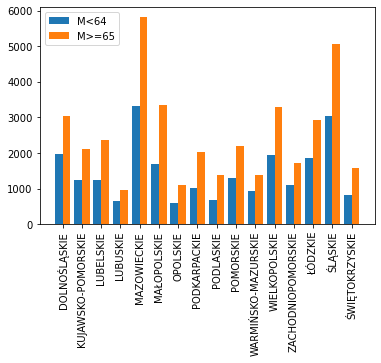

In [20]:
plt.bar(index - width/2, dataBar2numpy[:,2],width, label='M<64')
plt.bar(index + width/2, dataBar2numpy[:,3],width, label='M>=65')
plt.xticks(index, labels,rotation='vertical')
plt.legend()
plt.show()

In [23]:
dataMonth = df.groupby(['miesiąc']).agg({'K<=64': ['sum'],'K>=65': ['sum'],'M<=64': ['sum'],'M>=65': ['sum']})

daneKoncowe = []
for x in dataMonth.to_numpy()[:,2:6]:
    daneKoncowe.append(x.sum())
dataMonth

,K<=64,K>=65,M<=64,M>=65
,sum,sum,sum,sum
miesiąc,,,,
1,18819,119201,44900,100082
2,16703,108635,39321,90363
3,18087,111539,42217,94440
4,17237,103212,41182,88919
5,14543,81876,35250,70533
6,13633,77302,32991,65255
7,14009,77997,33913,66616
8,14027,77752,34000,65742


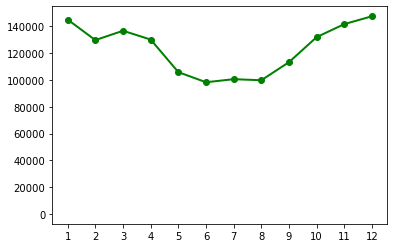

In [22]:
plt.plot(['1','2','3', '4','5','6','7','8','9','10','11','12'], daneKoncowe,'go-', label='line 1', linewidth=2)
plt.axhline(0, color='white')